In [89]:
import numpy as np

from tensorflow import keras
from keras import saving as sv

import scripts.utilities as utl

import models.inception_autoencoder

In [93]:
BATCH_SIZE = 3
IMG_SIZE = 128
INC_MODEL_50_PATH = 'trained-models/dsm-50/inc_model_50.keras'
INC_MODEL_100_PATH = 'trained-models/dsm-100/inc_model_100.keras'
MODEL_SAVE_PATH = 'trained-models/'
IMG_PATH = 'data/test-images/correct'
ANO_IMG_PATH = 'data/test-images/incorrect'
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
RANDOM_SEED = 42

In [94]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    brightness_range=[0.5, 1]
)

ano_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [95]:
train_generator = train_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED  
)

ano_generator = ano_datagen.flow_from_directory(
    ANO_IMG_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED
)

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


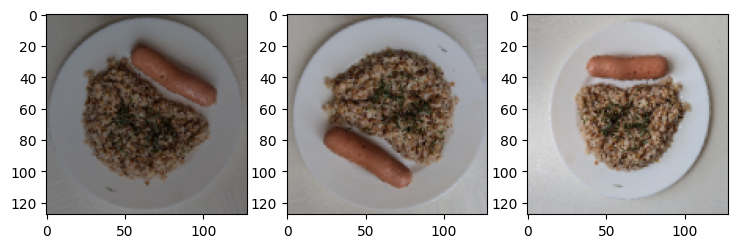

In [96]:
utl.plot_imgs(train_generator)

In [97]:
model_50 = sv.load_model(INC_MODEL_50_PATH)
model_100 = sv.load_model(INC_MODEL_100_PATH)

c:\Users\Nikit\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [98]:
model_50.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0000004),
    loss='mean_squared_error',
)
model_100.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0000004),
    loss='mean_squared_error',
)

In [99]:
epochs=50
history = model_50.fit(
    x=train_generator,
    epochs=epochs,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

Epoch 1/50


c:\Users\Nikit\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 37s 37s/step - loss: 0.0399
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step - loss: 0.0293
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step - loss: 0.0319
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step - loss: 0.0337
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step - loss: 0.0352
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step - loss: 0.0401
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step - loss: 0.0415
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step - loss: 0.0365
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step - loss: 0.0673
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step - loss: 0.0424
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step - loss: 0.0479
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step - loss: 0.0271
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step - loss: 0.0305
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step - loss: 0.0537
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step - loss: 0.0356
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━

In [100]:
epochs=50
history = model_100.fit(
    x=train_generator,
    epochs=epochs,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - loss: 0.0558
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step - loss: 0.0418
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step - loss: 0.0365
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step - loss: 0.0405
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step - loss: 0.0234
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step - loss: 0.0447
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step - loss: 0.0320
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step - loss: 0.0484
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step - loss: 0.0796
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step - loss: 0.0278
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step - loss: 0.0370
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step - loss: 0.0398
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step - loss: 0.0241
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step - loss: 0.0329
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step - loss: 0.0318
Epoch 16/50
1/1 ━━━━

In [103]:
grechka_recon_error_list = utl.get_error(train_generator, model_100, BATCH_SIZE)
ano_grechka_recon_error_list = utl.get_error(ano_generator, model_100, BATCH_SIZE)

clean = grechka_recon_error_list
fraud = ano_grechka_recon_error_list
threshold = np.mean(clean) + np.std(clean)

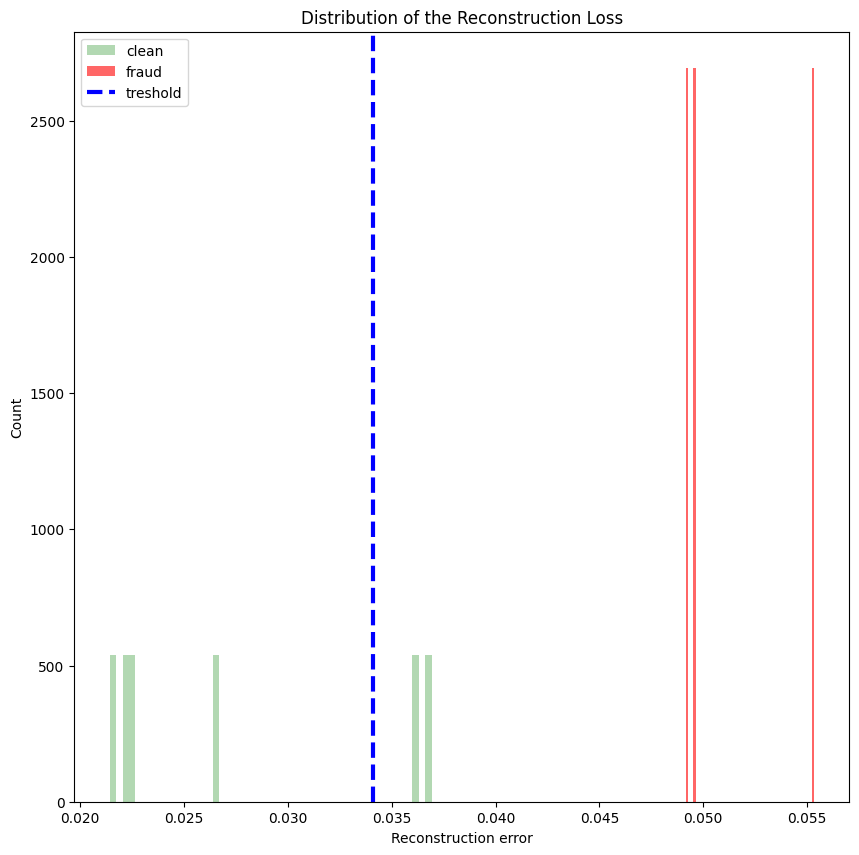

In [104]:
utl.plot_rec_distribution(clean, fraud, threshold)

In [105]:
model_50.save(MODEL_SAVE_PATH+'inc_model_50_with_test.keras')
model_100.save(MODEL_SAVE_PATH+'inc_model_100_with_test.keras')